In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline 
from wordcloud import WordCloud

In [2]:
columns=['tweet_english','label']
df = pd.read_excel(r'C:\Users\Hp\TUGAS AKHIR 2\data_twitter.xlsx', usecols=columns)
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head(4000)

,tweet_english,label
0,"['sis',' lutfi ',' matter ',' compensated ',' ...",positive
1,"['min', 'why', ""]",negative
2,"['indihome', 'flop', 'really', 'roll', 'loadin...",positive
3,"['please', 'check', '']",negative
4,"['connect', 'lan', 'ps', 'how', 'sis', 'fail']",negative
...,...,...
3995,"['access', 'indihome', 'net', 'telkomsel']",negative
3996,"['hello', 'boss', 'kekmin', 'internet', 'dead'...",negative
3997,"['indihome', 'really', 'nge', 'block', 'spotif...",positive
3998,"['indihome', 'rlly', 'testing', '']",negative


In [3]:
df['polaritas'] = df.label.map({'positive':1, 'negative':-1})
df

,tweet_english,label,polaritas
0,"['sis',' lutfi ',' matter ',' compensated ',' ...",positive,1
1,"['min', 'why', ""]",negative,-1
2,"['indihome', 'flop', 'really', 'roll', 'loadin...",positive,1
3,"['please', 'check', '']",negative,-1
4,"['connect', 'lan', 'ps', 'how', 'sis', 'fail']",negative,-1
...,...,...,...
22502,"['activated', 'card', 'already', 'scorched', '...",negative,-1
22503,"['sis',' help ',' hook ',' product ',' service...",positive,1
22504,"['', 'fertilizer', 'indonesia', 'persero', 'pr...",negative,-1
22505,"['hi', 'sis',' princess', 'sorry', 'access',' ...",negative,-1


In [4]:
x = np.array(df['tweet_english'].transpose())
y = df['polaritas']
print (x.shape)
print (y.shape)

(22507,)
(22507,)


In [5]:
#vektorisasi
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
print(x.shape)

(22507, 16267)


In [6]:
#splitting dataset ke dalam train dan test data (80 : 20)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

print ('\n total data train : ', ytrain.shape)
print ('\n total data test : ', ytest.shape)


 total data train :  (18005,)

 total data test :  (4502,)


In [7]:
print(xtrain.shape)
print(ytrain.shape)

(18005, 16267)
(18005,)


In [8]:
#klasifikasi data (80 : 20)
svc = SVC(kernel = "linear")

#memasukkan data training ke dalam klasifikasi SVM
svc = svc.fit(xtrain, ytrain)

#melakukan prediksi dari data test
predicted = svc.predict(xtest)
predicted

array([-1, -1, -1, ..., -1,  1,  1], dtype=int64)

In [9]:
print(accuracy_score(ytest, predicted))

0.9591292758773878


In [10]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      3211
           1       0.96      0.90      0.93      1291

    accuracy                           0.96      4502
   macro avg       0.96      0.94      0.95      4502
weighted avg       0.96      0.96      0.96      4502



In [11]:
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
cnf_matrix

array([[3158,   53],
       [ 131, 1160]], dtype=int64)

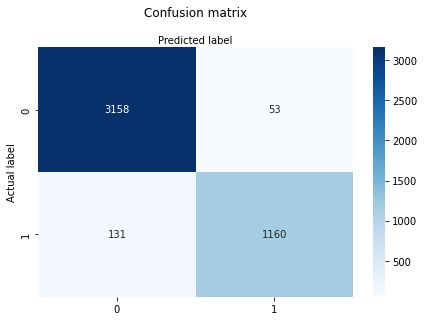

In [12]:
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()